<h1>Import libraries<h1>

In [1]:
from Skewness_transformations import *
Skewness = Skewness()
from Plots.Preprocessing_plots import Preprocessing_plots
Plots_preprocessing = Preprocessing_plots()

<h2>Download data<h2>

In [2]:
data = pd.read_csv("../Data/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


$\text{Let charge be the variable we will analyze.}$

<h2>Detection of skewness<h2>

$\text{The basic graphs with which we can verify the skewness of the distribution of a feature are the boxplot and the histogram.}$

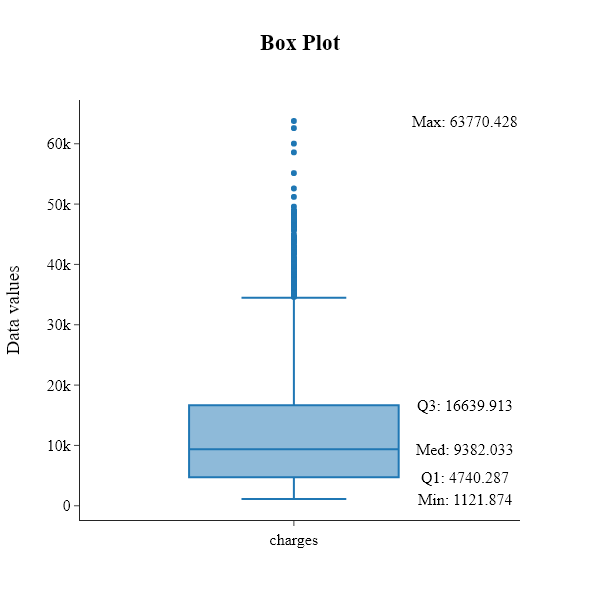

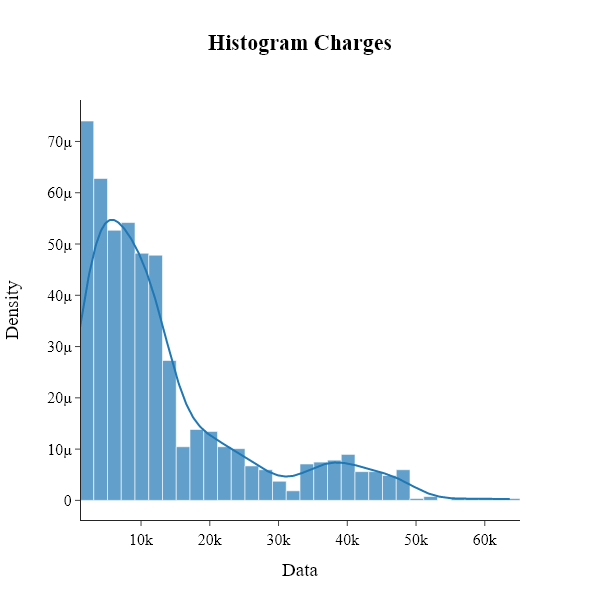

In [3]:
Plots_preprocessing.boxplot(data=data["charges"], with_annotation=True, name="charges")
Plots_preprocessing.hist_plot_with_kde(data=data["charges"], name="charges", bin_size=2000)

$\text{The distribution of the Charges variable resembles neither a normal nor a uniform distribution.}$<p>
$\text{The distribution of this feature is characterized by strong right skewness.}$<p>
$\text{The box chart confirms the presence of a large number of outliers.}$<p>

<h2>Calculate skewness<h2>

$$\gamma=\frac{\mu_{3,\ X}}{\left(N-1\right)\times\sigma_X^3}=\frac{\sum_{i=1}^{N}\left(X_i-\bar{X}\right)^3}{\left(N-1\right)\times{\sqrt{\frac{\sum_{i=1}^{N}\left(X_i-\bar{X}\right)^2}{N}}}^3}$$

In [4]:
print("Skewness of charges variable is: {}".format(Skewness.calculate_skewness(data=data["charges"])))

Skewness of charges variable is: 1.5153122322275097


$\text{As we can see } \gamma_{charges} \approx 1.515 > 0 \rightarrow \text{ charges is right-sided skewed.}$

<h2>Transforming skewed feature<h2>

$\textbf{Logarithmic transformation:}$
$${\hat{X}}_{m,i}=\ln{\left(X_{m,i}\right)}$$
$\text{Where: }  {\hat{X}}_{m,i} \text{ – logarithm observation } i \text{ of variable } m,$<p>
$X_{m,i} \text{ – observation } i \text{ of variable } m.$<p>
$\text{A convenient and easily interpretable way to transform a highly skewed variable into a more normalized dataset.}$<p>
$\text{In most cases, a logarithmic transformation allows you to reduce the variance in your data.}$<p>
$\text{The disadvantage of this solution is the possibility of application only to data containing positive values.}$

In [5]:
data_logarithmic_transformed = Skewness.logarithmic_transformation(data=data["charges"])

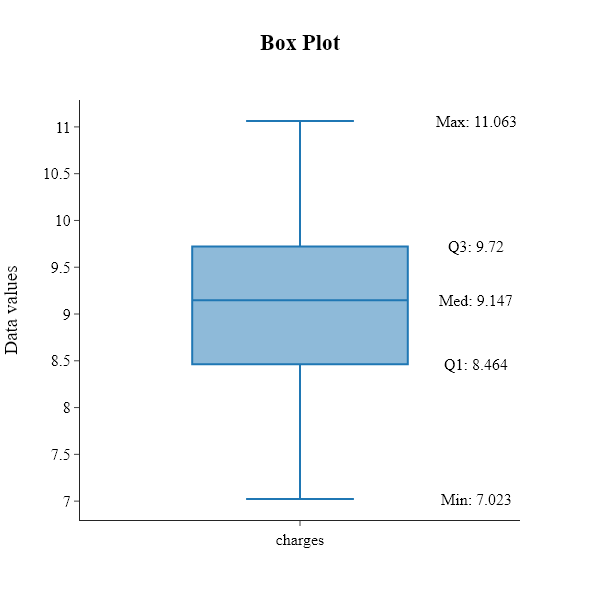

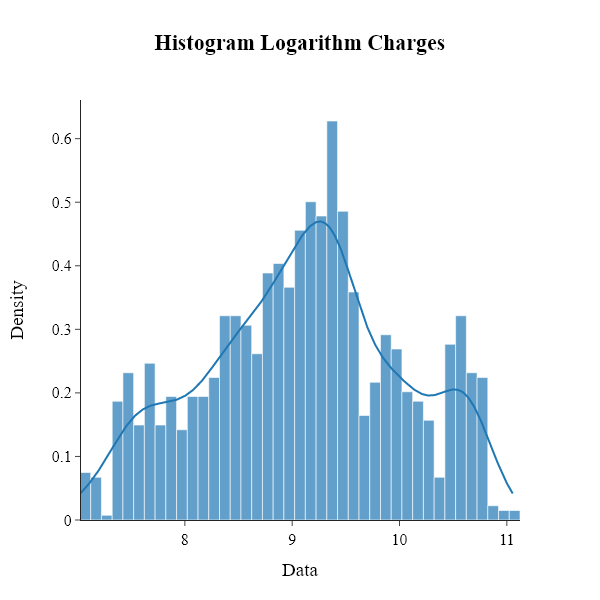

In [6]:
Plots_preprocessing.boxplot(data=data_logarithmic_transformed, with_annotation=True, name="charges")
Plots_preprocessing.hist_plot_with_kde(data=data_logarithmic_transformed, name="Logarithm charges", bin_size=0.1)

$\text{As we can see logairthmic transformed data looks much better in terms of skewness!}$

$\textbf{Square root transformation:}$
$${\hat{X}}_{m,i}=\sqrt{X_{m,i}}$$
$\text{Where: } {\hat{X}}_{m,i} \text{ – sqaure root observation } i \text{ of variable } m,$<p>
$X_{m,i} \text{ – observation } i \text{ of variable } m.$<p>
$\text{The modified set should also resemble a normal distribution, but this method is weaker than the logarithmic or cubic transformation.}$<p>
$\text{Again, a big limitation is that the application is limited to non-negative data only.}$

In [7]:
data_square_root_transformed = Skewness.square_root_transformation(data=data["charges"])

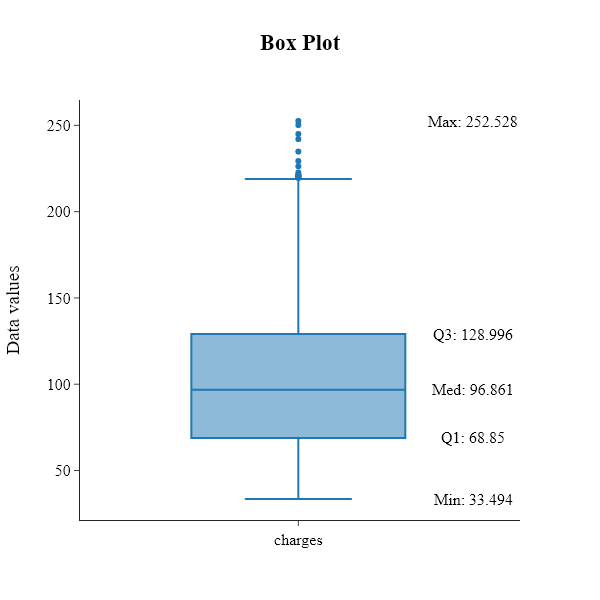

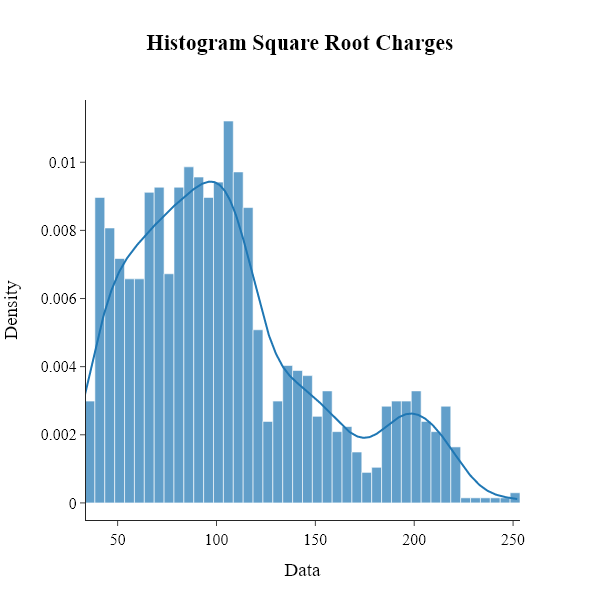

In [8]:
Plots_preprocessing.boxplot(data=data_square_root_transformed, with_annotation=True, name="charges")
Plots_preprocessing.hist_plot_with_kde(data=data_square_root_transformed, name="Square Root charges", bin_size=5)

$\text{As we can see square root transformation decreased values, but the data still looks like right skewed.}$

$\textbf{Box Cox transformation:}$
$${\hat{X}}_{m,i}=\begin{cases}
               ln{\left(X_{m,i}\right)} \text{ if } \lambda=0 \\ 
                \frac{X_{m,i}^\lambda-1}{\lambda} \text{ otherwise}
               \end{cases}$$
$\text{Where: } {\hat{X}}_{m,i} \text{ – modified observation } i \text{ of variable } m,$<p>
$X_{m,i} \text{ – observation } i \text{ of variable } m.$<p>
$\lambda \text{ – transforming parameter in the range } [-5.5].$
$\text{By maximizing the log-likelihood function described as:}$
$$LL\left(\lambda,\mu,\sigma\right)=-\frac{N}{2}\times\ln{\left(2\times\pi\right)}-\frac{N}{2}\times\ln{\left(\sigma^2\right)}-\frac{1}{2\times\sigma^2}\times\sum_{i=1}^{N}\left(X_{m,i}-\mu\right)^2+\left(\lambda-1\right)\times\sum_{i=1}^{N}\ln{\left(X_{m,i}\right)}$$
$\text{we can find the optimal value of the } \lambda \text{ parameter.}$<p>
$\text{Despite obtaining the best value, which will translate into the theoretically most optimal (in terms of the mean and variance) transformation,}$<p>
$\text{the interpretation of the obtained results is a problem.}$

In [14]:
data_box_cox_transformed = Skewness.box_cox_transformation(data=data["charges"], reg_lambda=0.3)

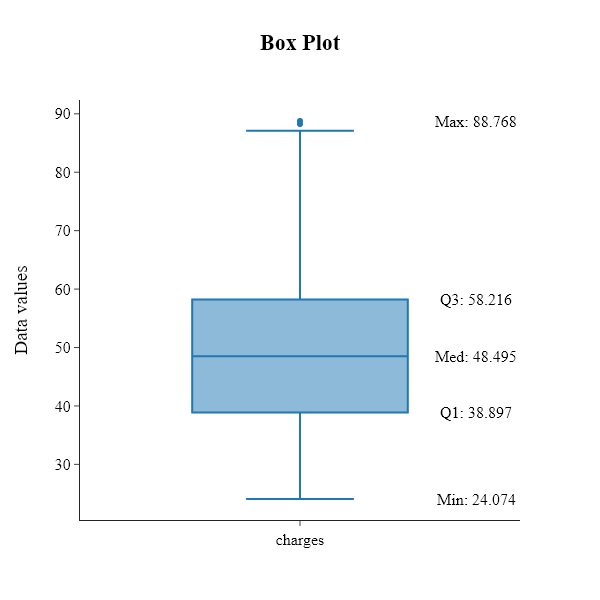

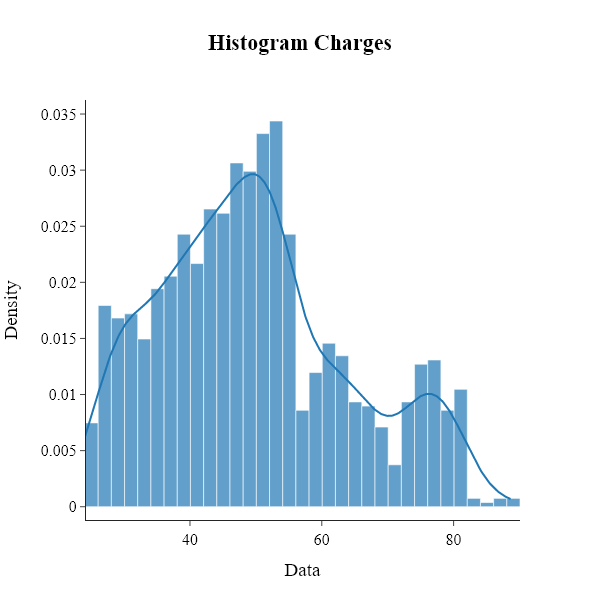

In [15]:
Plots_preprocessing.boxplot(data=data_box_cox_transformed, with_annotation=True, name="charges")
Plots_preprocessing.hist_plot_with_kde(data=data_box_cox_transformed, name="charges", bin_size=2)

$\text{It does not look as good as logarithmic transformation, but better than root square transformation.}$<p>
$\text{We will try to optimize the } \lambda \text{ parameter using scipy library.}$

In [16]:
from scipy.stats import boxcox
_, optimal_lambda = boxcox(data['charges'])

In [17]:
data_box_cox_transformed = Skewness.box_cox_transformation(data=data["charges"], reg_lambda=optimal_lambda)

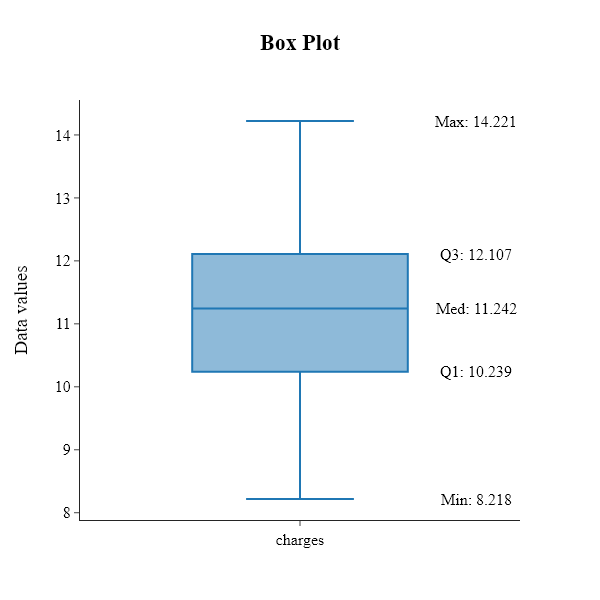

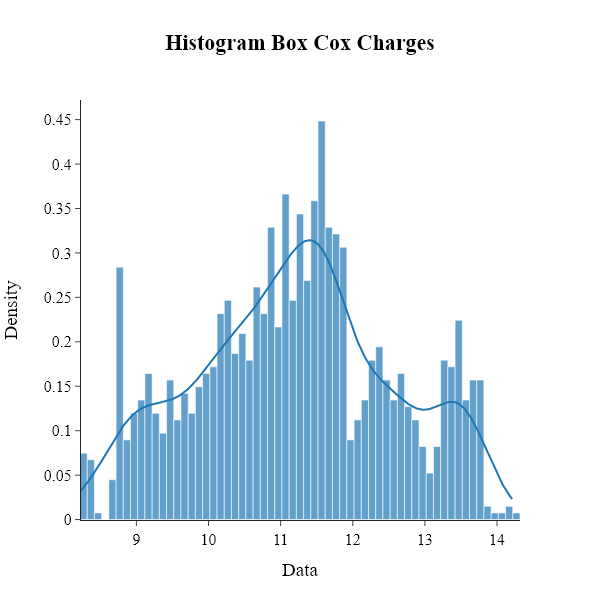

In [18]:
Plots_preprocessing.boxplot(data=data_box_cox_transformed, with_annotation=True, name="charges")
Plots_preprocessing.hist_plot_with_kde(data=data_box_cox_transformed, name="Box Cox charges", bin_size=0.1)

$\text{It looks much better, compared to original data!}$